<a href="https://colab.research.google.com/github/namans-git/iit_intern/blob/main/maximum_likelihood_est.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parameter Estimation**

Parameter Estimation is the branch of statistics that involves using sample data to estimate the parameters of a distribution and the techniques used for parameter estimation are called **estimators**.

In this report, we look at some of those estimators.

Maximum Likelihood Estimator

* Maximum Likelihood Estimation (MLE) is a method of estimating the parameters of a statistical model given observations, by finding the **parameter values that maximize the likelihood of making the observations given the parameters**.

* With prior assumption or knowledge about the data distribution, Maximum Likelihood Estimation helps find the most likely-to-occur distribution parameters.

* Maximum Likelihood Estimation iteratively searches the most likely mean and standard deviation that could have generated the distribution.

Maximum Likelihood Estimator:

$\hat{\theta}_{MLE}  = \underset{\theta \hspace{0.1cm} \in \hspace{0.1cm} \Theta}{argmax} [log(\prod_{i=1}^{n}p_\theta(x_i))] = \underset{\theta \hspace{0.1cm} \in \hspace{0.1cm} \Theta}{argmax} \prod_{i=1}^{n}p_\theta(x_i)$

$\prod_{i=1}^{n}p_\theta(x_i)$ is the likelihood function. The MLE is the 'theta' that maximizes the likelihood function. We use log-likelihood instead of likelihood for easier calculation.

Computing the maximum likelihood estimator for single-dimensional parameters we get:

$\hat{p}_{MLE} = \frac{1}{n}\sum_{i=1}^{n}x_i$

Let us implement this on real world data ~

In [ ]:
#install libraries
#pip install fitter
#pip install distfit

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)
import seaborn as sns
import scipy.stats
from distfit import distfit
%matplotlib inline

USA Housing Dataset [12]

In [ ]:
#reading data
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Exploratory Data Analysis ~

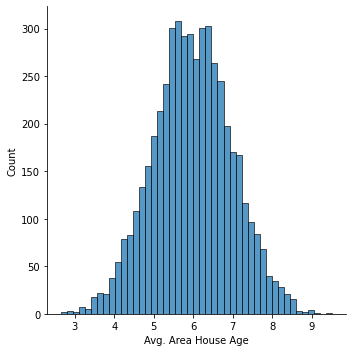

In [ ]:
#our target variable/column
sns.displot(df['Avg. Area House Age'])

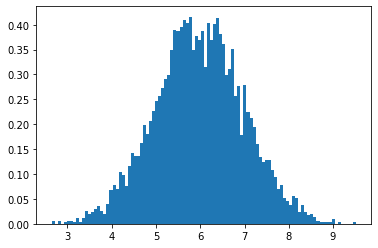

In [ ]:
#viewing the probability distribution function
plt.hist(df['Avg. Area House Age'], bins = 100, density = True)
plt.show()

Using external libraries (DistFit and Fitter) to find the distribution of our variable ~

In [ ]:
X = df['Avg. Area House Age'].values #creating a numpy array

In [ ]:
# initialize distfit
dist = distfit()

# determine best-fitting probability distribution for data
dist.fit_transform(X)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00980068] [loc=5.977 scale=0.991]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.46752] [loc=2.644 scale=3.333]
[distfit] >[pareto    ] [0.19 sec] [RSS: 2.05316] [loc=-0.008 scale=2.653]
[distfit] >[dweibull  ] [0.12 sec] [RSS: 0.0176146] [loc=5.972 scale=0.855]
[distfit] >[t         ] [0.16 sec] [RSS: 0.00980056] [loc=5.977 scale=0.991]
[distfit] >[genextreme] [0.19 sec] [RSS: 0.0149023] [loc=5.608 scale=0.987]
[distfit] >[gamma     ] [0.18 sec] [RSS: 0.00979059] [loc=-272.155 scale=0.004]
[distfit] >[lognorm   ] [0.46 sec] [RSS: 0.00984031] [loc=-95.886 scale=101.858]
[distfit] >[beta      ] [0.16 sec] [RSS: 0.0099677] [loc=-1.998 scale=15.698]
[distfit] >[uniform   ] [0.00 sec] [RSS: 1.01482] [loc=2.644 scale=6.875]
[distfit] >[loggamma  ] [0.17 sec] [RSS: 0.0100465] [loc=-171.453 scale=26.891]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.gamma_gen at 0x7f19b0eb3c50>,
  'stats': 'RSS',
  'params': (78709.53470699734, -272.15494186524063, 0.0035336521454779734),
  'name': 'gamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f19aea2e8d0>,
  'score': 0.009790593346559033,
  'loc': -272.15494186524063,
  'scale': 0.0035336521454779734,
  'arg': (78709.53470699734,),
  'CII_min_alpha': 4.3485208192788605,
  'CII_max_alpha': 7.609845686245251},
 'summary':          distr     score  LLE         loc       scale  \
 0        gamma  0.009791  NaN -272.154942    0.003534   
 1            t  0.009801  NaN    5.977235    0.991371   
 2         norm  0.009801  NaN    5.977222    0.991357   
 3      lognorm   0.00984  NaN  -95.886398  101.858289   
 4         beta  0.009968  NaN   -1.997678   15.698361   
 5     loggamma  0.010047  NaN -171.453171   26.891315   
 6   genextreme  0.014902  NaN    5.608434    0.986801   
 7     dweibull  0.017615  NaN    5.971571    0

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f19a9cb5c10>)

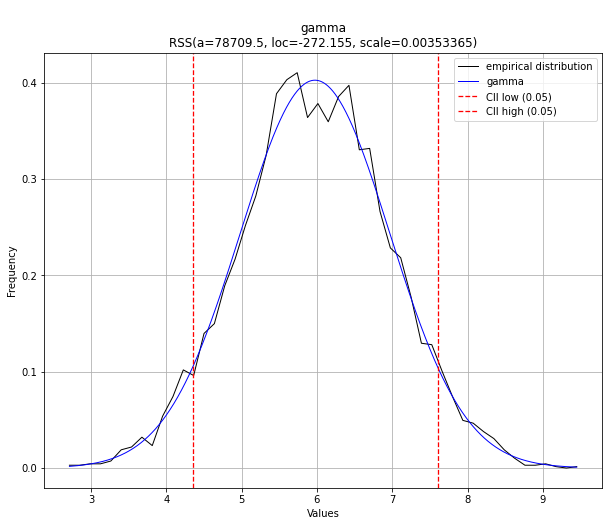

In [ ]:
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f19a9bca650>)

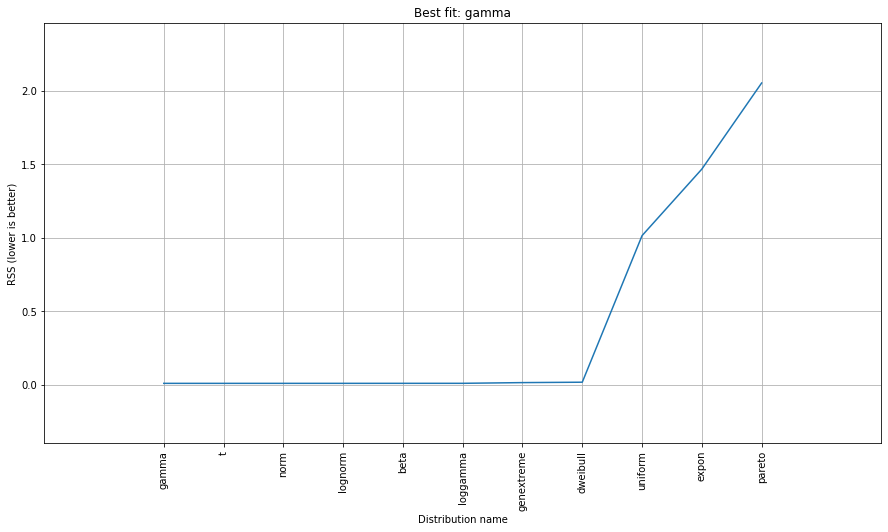

In [ ]:
dist.plot_summary()

Fitter

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

Fitting 4 distributions: 100%|██████████| 4/4 [00:21<00:00,  5.35s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.039972,589.653110,-58658.247355,inf,0.008316,8.767835e-01
norm,0.039983,587.875022,-58665.479247,inf,0.008218,8.854479e-01
invweibull,0.247172,628.365162,-49548.776332,inf,0.061857,4.490704e-17
reciprocal,4.164641,inf,-35418.746394,NaN,1.000000,0.000000e+00


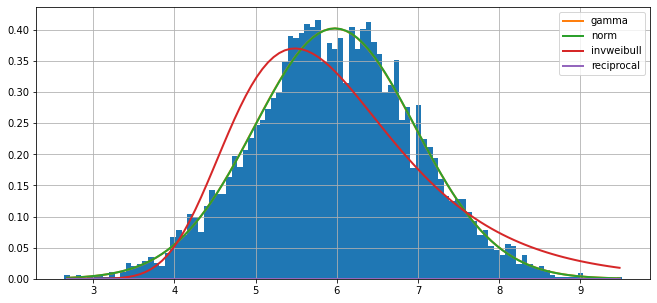

In [ ]:
plt.rcParams["figure.figsize"] = (11, 5)
f = Fitter(X, distributions = ['norm','gamma','invweibull','reciprocal'])
f.fit()
f.summary()

Though the gamma distribution has a better sumsquare_error value (which is what is indicated by DistFit as well), we have the luxury to look at other parameters as well, which include AIC and BIC values.

A lower AIC value indicates a better-fit model, which is 'norm' in this case and as the complexity of a model increases, BIC value increases and as likelihood increases, BIC decreases. So, a lower score is better.

Hence, we can to the conclusion that the distribution that best fits the data is '**normal**' distribution. The difference between the sumsquare error score between 'gamma' and 'norm' is minute, so AIC and BIC values are what we can look at and they indicate a normal distribution.

---

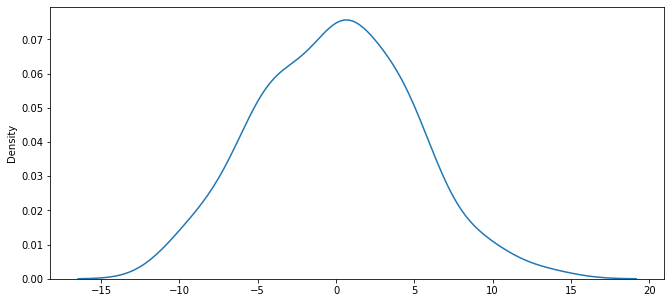

In [ ]:
## lets take an artificially generated dataset to understand maximum likelihood estimation
## random normal distribution

mean = 0
std = 5
n_points = 100
data = np.random.normal(mean,std,n_points)
ax = sns.distplot(data, hist = False)

Formula for mean using MLE: $\mu_{ML} =  \frac{1}{N}\sum_{n=1}^{N}x_n$

In [ ]:
mu_ML = 1/n_points*sum(data)
print("Maximum Likelihood estimation of the mean is " + str(mu_ML))
print("The actual mean is "+ str(mean))

Maximum Likelihood estimation of the mean is -0.5492845440505104
The actual mean is 0


Formula for variance using MLE:
$\sigma^{2}_{ML} =  \frac{1}{N}\sum_{n=1}^{N}(x_n - \mu_{ML})^{2}$

In [ ]:
var_ML = (1/n_points)*sum([(x-mu_ML)**2 for x in data])
print("Maximum likelihood estimation of variance is "+str(var_ML))
print("True variance is " + str(std**2))

Maximum likelihood estimation of variance is 19.0986750789198
True variance is 25


Now we use MLE on some real world data ~

In [ ]:
df.head() #[12]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Running 5000 instances of the maxm likelihood function for both parameters ~

In [ ]:
#defining the maximum likelihood function for mean

def mu_ML_real(randomSamp):#randomSamp are the no of samples we take in each instance
  inst = 1/sample_size*sum(random_samples)
  return inst

In [ ]:
sample_size = 50#no of samples we'll be taking at a time
mean_mle_results = []

for i in range(5000):

  random_samples = np.random.choice(X, sample_size)# random samples from X (size=sample size)

  if mu_ML_real(random_samples) != None:
    mean_mle_results.append(mu_ML_real(random_samples))
  else:
    None

In [ ]:
len(mean_mle_results)#5000 instances of the maxm likelihood fn(mean) using 50 samples from the original data column

5000

In [ ]:
X.mean()

5.977222035280273

Variance ~

In [ ]:
#defining the maximum likelihood function for variance
sample_size = 50

def var_ML_real(randomSamp):
  inst_var = (1/sample_size)*sum([(x-mu_ML_real(random_samples))**2 for x in random_samples])
  return inst_var

In [ ]:
sample_size = 50
var_mle_results = []

for i in range(5000):

  random_samples = np.random.choice(X, sample_size)# random samples from X (size=sample_size)

  if var_ML_real(random_samples) != None:
    var_mle_results.append(var_ML_real(random_samples))
  else:
    None

In [ ]:
len(var_mle_results)#5000 instances of the maxm likelihood fn(var) using 50 samples from the original data column

5000

Calculating Mean Squared Error ~

In [ ]:
actual_mean = [X.mean()]*5000
actual_var = [X.var()]*5000

In [ ]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(actual_mean, mean_mle_results)
mse_var = mean_squared_error(actual_var, var_mle_results)

In [ ]:
print("The mean squared error for maxm likelihood estimation of mean is " + str(mse_mean))
print("The mean squared error for maxm likelihood estimation of variance is " + str(mse_var))

The mean squared error for maxm likelihood estimation of mean is 0.019381137866621684
The mean squared error for maxm likelihood estimation of variance is 0.03665966587030247
